Project Submission

# Neural Networks - Project: Bank Churn Prediction

### Tor Henrik Nilsen

## 1. Load Data set and Libraries

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import optimizers

In [ ]:
#!pip install tensorflow==2.0

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import datasets, one for data preperation for modelling and keep the original data in the second dataset for EDA

In [6]:
df = pd.read_csv('/content/drive/My Drive/bank.csv')

In [184]:
df_original = pd.read_csv('/content/drive/My Drive/bank.csv')

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 2. Feature Elimination





Remove features which are not relevant. Name, row number and Surname does not add value for the model. The target variable is removed from the dataset and stored in the y dataset for later

Keep the Customer ID in a seperate dataset, and join this dataset in at the end when comparing prediction with test set

In [199]:
df_CustomerId = df_original[['CustomerId','EstimatedSalary','CreditScore','Age','Exited']]

In [15]:
df = df.drop(labels=['CustomerId','RowNumber','Surname'], axis = 1)

Check for missing values

In [16]:
df.isna().any()

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [13]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

Disitribution of the target variable

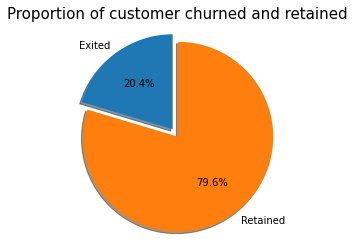

In [21]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(5, 4))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 15)
plt.show()

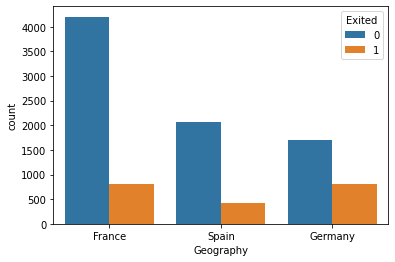

In [12]:
sns.countplot(x='Geography', hue = 'Exited',data = df)

Most customers are located in France. There are proportional high churn in the areas where the bank has fewer customers.

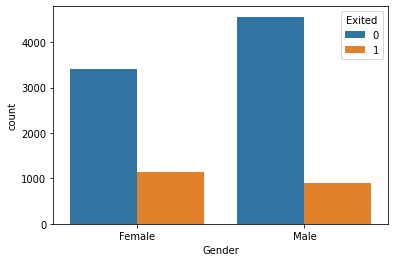

In [13]:
sns.countplot(x='Gender', hue = 'Exited',data = df)

The proportion of female customers churning is also greater than that of male customers


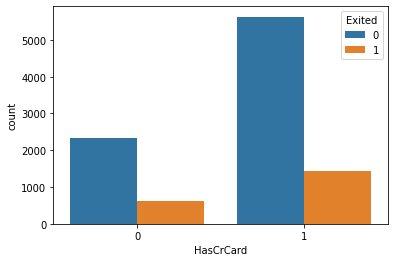

In [14]:
sns.countplot(x='HasCrCard', hue = 'Exited',data = df)

Many customers that churned are those with credit cards. But the majority of the customers have credit cards, so it is hard to tell if there is a correlation.


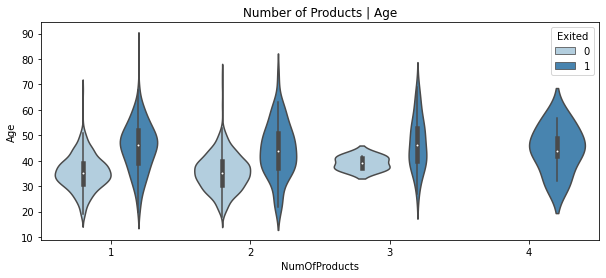

In [39]:
plt.figure(figsize=[10,4])
mask=(df.HasCrCard==0) & (df.IsActiveMember==0)
sns.violinplot(x="NumOfProducts", y="Age", hue="Exited", data=df[mask], palette="Blues")
plt.xlabel("NumOfProducts")
plt.ylabel("Age")
plt.title('Number of Products | Age',fontsize = 12)
plt.xticks(size = 10)
plt.yticks(size = 10);

Customers with several cards are more likely to churn and the the higher age, the there seems to be higher churn

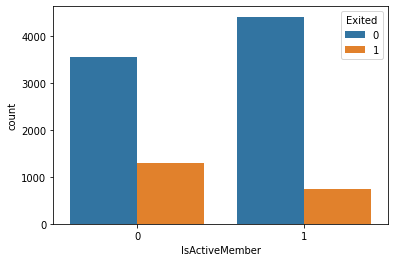

In [15]:
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df)

Inactive customers have a greater churn. The proportion of inactive members is quite high which 

### Credit Score

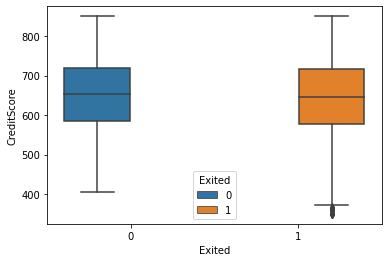

In [24]:
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df)

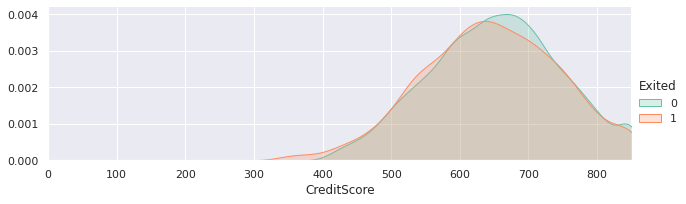

In [ ]:
facet = sns.FacetGrid(df, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"CreditScore",shade= True)
facet.set(xlim=(0, df["CreditScore"].max()))
facet.add_legend()

plt.show()

There is no significant difference in the credit score distribution between retained and churned customers.


## Age



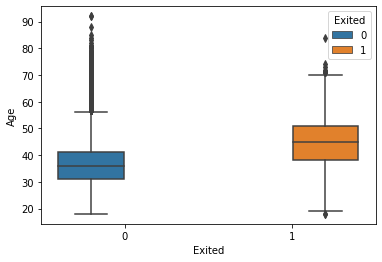

In [26]:
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df)

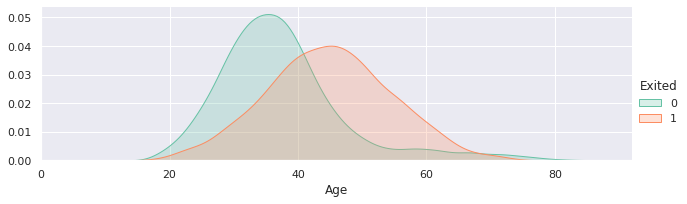

In [ ]:
facet = sns.FacetGrid(df, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Age",shade= True)
facet.set(xlim=(0, df["Age"].max()))
facet.add_legend()

plt.show()

The older customers have hgher churn compared with the younger ones. This could be related to difference in service preference. In order to manage churn there is a need to analyse retention between the different age groups

## Tenure

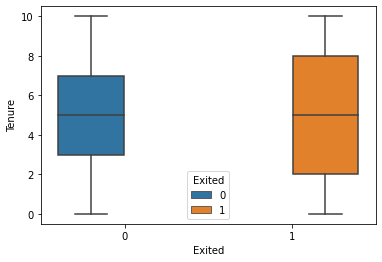

In [28]:
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df)

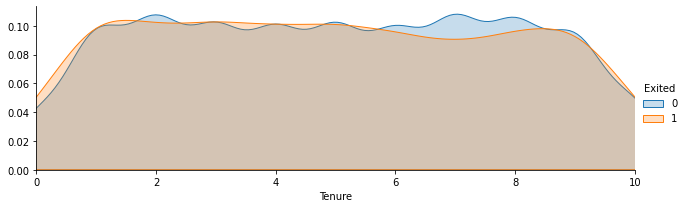

In [23]:
facet = sns.FacetGrid(df, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Tenure",shade= True)
facet.set(xlim=(0, df["Tenure"].max()))
facet.add_legend()

plt.show()

## Balance

With regard to the tenure, the mean value is similar betwwen the two classes, but the churners have wider range of observations of this features.

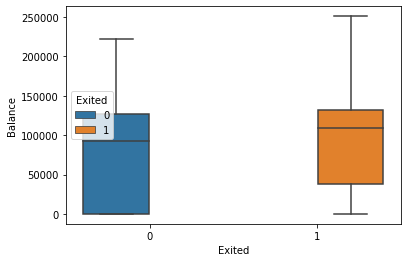

In [30]:
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df)

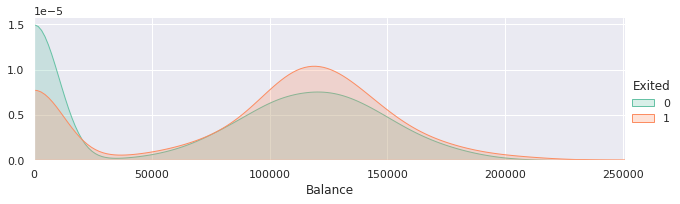

In [ ]:
facet = sns.FacetGrid(df, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Balance",shade= True)
facet.set(xlim=(0, df["Balance"].max()))
facet.add_legend()

plt.show()

The bank is losing customers with significant bank balances.

## Number of Products

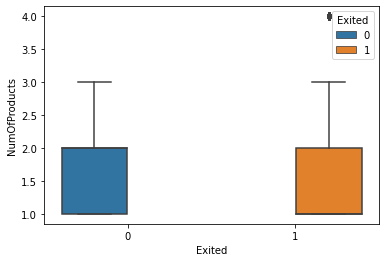

In [31]:
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df)

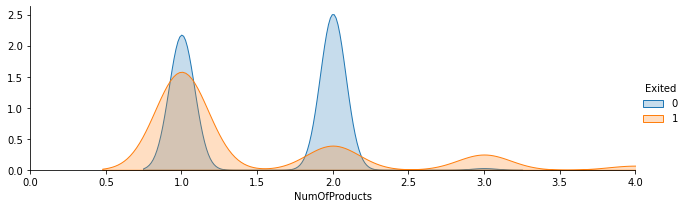

In [32]:
facet = sns.FacetGrid(df, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"NumOfProducts",shade= True)
facet.set(xlim=(0, df["NumOfProducts"].max()))
facet.add_legend()

plt.show()

The features Number of Products and Salary have no significant effect on the likelihood to churn.

## Estimated Salary

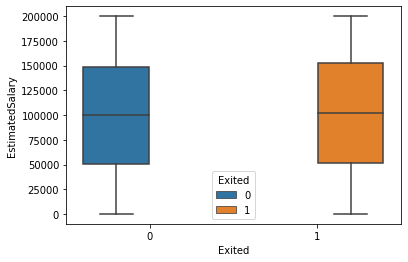

In [33]:
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df)

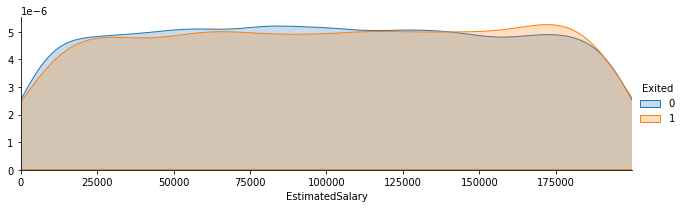

In [34]:
facet = sns.FacetGrid(df, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"EstimatedSalary",shade= True)
facet.set(xlim=(0, df["EstimatedSalary"].max()))
facet.add_legend()

plt.show()

The Salary feature does not distinguish churn

In [ ]:
import seaborn as sns
sns.set(palette="Set2")

### Visualize the findings regarding Churn and Age and Balance.

We can see here clearly that in higher age groups, there is a higher share of customers which churn

For feature balance, there are no clear correlation of churn

The same can be said about the credit score. No clear correlation between churn and level of score

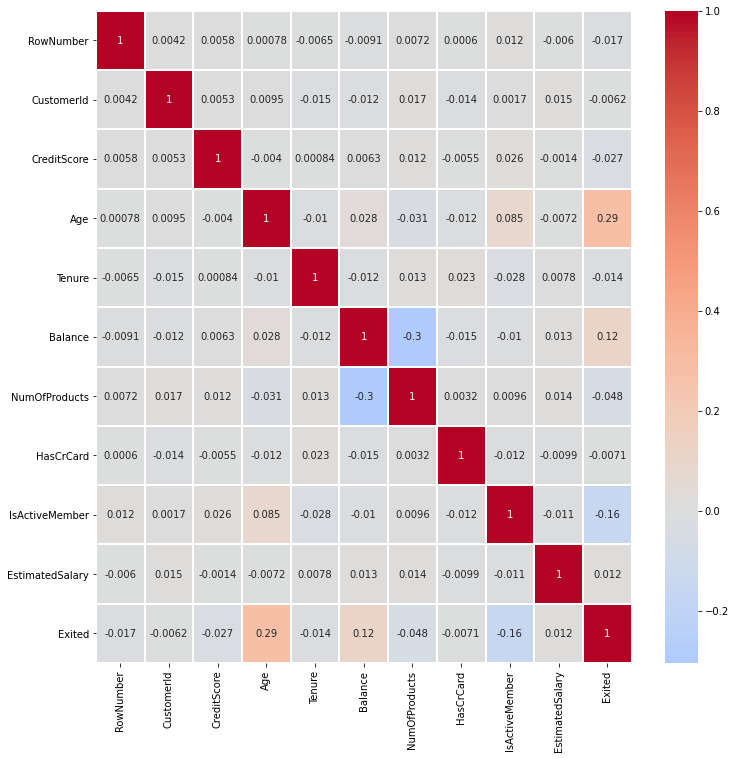

In [ ]:
#Create figure
f, ax = plt.subplots(figsize = (12,12))

#Create and plot correlation matrix
corr = df.corr()
sns.heatmap(corr, ax=ax, linewidths= 1, linecolor='white',annot = True, cmap = 'coolwarm',center = 0);

Very low correlation between features.
Age seems to have the highest correlation with Churn compared with the other features.

## 4. Distinguish the feature and target set and divide the data set into training and test sets

In [170]:
#X = df.drop(labels=['Exited'], axis = 1)
df_managed = df
#y = df['Exited']

In [ ]:
# Keep a set of X with the target variable for final illustration of prediciting on new data


**Preparing Data for Modelling**

In [171]:
label1 = LabelEncoder()
df_managed['Geography'] = label1.fit_transform(df_managed['Geography'])

In [172]:
label = LabelEncoder()
df_managed['Gender'] = label.fit_transform(df_managed['Gender'])
df_managed.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [173]:
df_managed = pd.get_dummies(df_managed, drop_first=True, columns=['Geography'])
df_managed.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_1,Geography_2
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


### Remove Target Variable

In [174]:
X = df_managed.drop(labels=['Exited'], axis = 1)
y = df_managed['Exited']

**Split dataset into train and test**

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

## 5. Normalize the data - Scale the data

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
type(X_train)

numpy.ndarray

In [24]:
type(y_train)

pandas.core.series.Series

Make series into array

In [25]:
y_test = y_test.values

In [26]:
y_train = y_train.values

## 6. Initialize & build the model - ANN Modelling Version #1

In [114]:
Nbr_Features = X_train.shape[1]
print('Numer of units for input layer :', Nbr_Features)

Numer of units for input layer : 11


In [105]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw


# input layer
model.add(Dense(11,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(6, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(3, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam',  metrics = ['accuracy'])

In [106]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          batch_size=32,
          validation_data=(X_test, y_test), 
          )

Epoch 1/100
250/250 [==============================] - 1s 3ms/step - loss: 0.6272 - accuracy: 0.7540 - val_loss: 0.4705 - val_accuracy: 0.7965
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.5012 - accuracy: 0.7971 - val_loss: 0.4458 - val_accuracy: 0.7965
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4799 - accuracy: 0.7957 - val_loss: 0.4356 - val_accuracy: 0.7965
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4728 - accuracy: 0.7948 - val_loss: 0.4318 - val_accuracy: 0.7965
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4604 - accuracy: 0.7968 - val_loss: 0.4275 - val_accuracy: 0.7965
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4441 - accuracy: 0.8010 - val_loss: 0.4224 - val_accuracy: 0.7965
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4455 - accuracy: 0.7977 - val_loss: 0.4194 - val_accuracy: 0.7965

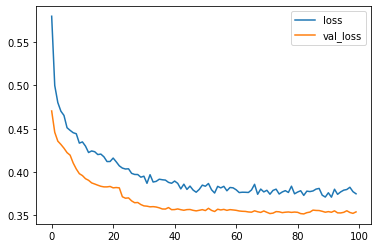

In [107]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [110]:
# Loss = Training Loss
# val_loss = losses on the train set (X_test and Y_test)
losses.tail(10)

,loss,accuracy,val_loss,val_accuracy
90,0.376036,0.837625,0.354291,0.8545
91,0.370950,0.842750,0.353561,0.8545
92,0.380134,0.836750,0.355188,0.8535
93,0.374246,0.837875,0.352859,0.8540
94,0.377031,0.840500,0.352749,0.8545
95,0.379056,0.837625,0.353472,0.8555
96,0.379816,0.835750,0.355287,0.8555
97,0.382398,0.839000,0.353298,0.8575
98,0.377335,0.838375,0.352281,0.8570
99,0.374866,0.839125,0.353986,0.8565


In [111]:
# Classification Report for the Test set
from sklearn.metrics import classification_report,confusion_matrix
y_pred = model.predict_classes(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1593
           1       0.81      0.39      0.52       407

    accuracy                           0.86      2000
   macro avg       0.83      0.68      0.72      2000
weighted avg       0.85      0.86      0.84      2000



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [112]:
cm = confusion_matrix(y_test, predictions)
print(cm)
accuracy_score(y_test, y_pred)

[[1555   38]
 [ 249  158]]


0.8565

### View Table with Actual and predicted

In [131]:
#y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [140]:
MyTable = pd.DataFrame(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1), columns=['pred','Actual'])
MyTable

,pred,Actual
0,0,1
1,0,0
2,0,0
3,1,1
4,0,1
...,...,...
1995,0,0
1996,0,0
1997,0,0
1998,1,1


In [207]:
MyTable['Diff'] = MyTable['pred'] - MyTable['Actual']


In [209]:
MyTable.head()

,pred,Actual,Diff
0,0,1,-1
1,0,0,0
2,0,0,0
3,1,1,0
4,0,1,-1


In [143]:
MyTable['Diff'].value_counts()

 0    1713
-1     249
 1      38
Name: Diff, dtype: int64

In [144]:
# Validating the Accuracy
1713 / (1713+249+38)

0.8565

# EXTRA : Create New Customer

In [175]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df_managed.drop('Exited',axis=1).iloc[random_ind]
#new_customer = X.iloc[random_ind]
new_customer

CreditScore         540.0
Gender                0.0
Age                  40.0
Tenure                8.0
Balance               0.0
NumOfProducts         2.0
HasCrCard             1.0
IsActiveMember        0.0
EstimatedSalary    3560.0
Geography_1           0.0
Geography_2           1.0
Name: 9521, dtype: float64

In [176]:
# View the Customer Data
pd.DataFrame(new_customer).T

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_1,Geography_2
9521,540.0,0.0,40.0,8.0,0.0,2.0,1.0,0.0,3560.0,0.0,1.0


In [177]:
# Find the shape to make sure new data set has the same
df_managed.shape, X_test.shape, new_customer.shape

((10000, 12), (2000, 11), (11,))

In [178]:
New_Customer_Predict_class = model.predict_classes(new_customer.values.reshape(1,11))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [179]:
pd.DataFrame(New_Customer_Predict_class)

,0
0,0


In [180]:
df_managed.iloc[random_ind]['Exited']

0.0

In [181]:
pd.DataFrame(df_managed.iloc[random_ind]).T

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_1,Geography_2
9521,540.0,0.0,40.0,8.0,0.0,2.0,1.0,0.0,3560.0,0.0,0.0,1.0
